# 금융 통계 실습 08 - 수익과 위험

### [금융 데이터 분석 입문]
#### 이승준 http://fb.com/plusjune

# 수익과 위험

In [1]:
%matplotlib inline

* 코스피 시총 상위 (2015-06-30)
* 한국거래소 홈페이지 데이터
* https://docs.google.com/spreadsheets/d/14VmpBVcTgf-Fwpz1HnKE5-jAsMEACqVr5x-ancn-Dr8

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime

from pandas_datareader import data, wb

In [3]:
syms = [
    '^KS11', # 코스피 지수
    '005930.KS', # 삼성전자
    '000660.KS', # SK하이닉스
    '005380.KS', # 현대차
    '015760.KS', # 한국전력
    '090430.KS', # 아모레퍼시픽
    '032830.KS', # 삼성생명
    '035420.KS', # NAVER
    '012330.KS', # 현대모비스
    '006280.KS', # 녹십자
    '012750.KS', # 에스원
    '003490.KS', # 대한항공
    '000210.KS', # 대림산업
    '004990.KS', # 롯데제과
    '192400.KS', # 쿠쿠전자
    '007310.KS', # 오뚜기   
]

In [4]:
start = datetime(2014, 1 ,1)
end = datetime(2014, 12, 31)

p = data.get_data_yahoo(syms, start=start, end=end)
mask = p['Volume']['^KS11'] > 0
df = p['Adj Close'].ix[mask]

In [5]:
syms_names = {}

url_tmp = 'http://finance.yahoo.com/d/quotes.csv?s=%s&f=%s' 
for sym in syms:
    url = url_tmp % (sym, 'n')
    r = requests.get(url)
    name = r.text.replace('"', '').strip()
    print (name)
    syms_names[sym] = name
    
print (syms_names)

KOSPI Composite Index
Samsung Electronics
SK hynix
HyundaiMtr
KEPCO
AMOREPACIFIC
SAMSUNG LIFE
NAVER
Mobis
GC Corp
S-1
KAL
DaelimInd
LotteConf
CUCKOO
Ottogi
{'003490.KS': 'KAL', '015760.KS': 'KEPCO', '005930.KS': 'Samsung Electronics', '000660.KS': 'SK hynix', '006280.KS': 'GC Corp', '192400.KS': 'CUCKOO', '035420.KS': 'NAVER', '090430.KS': 'AMOREPACIFIC', '032830.KS': 'SAMSUNG LIFE', '004990.KS': 'LotteConf', '000210.KS': 'DaelimInd', '007310.KS': 'Ottogi', '012330.KS': 'Mobis', '^KS11': 'KOSPI Composite Index', '005380.KS': 'HyundaiMtr', '012750.KS': 'S-1'}


In [6]:
df = df.rename(columns=syms_names)
df.head()

,DaelimInd,SK hynix,KAL,LotteConf,HyundaiMtr,Samsung Electronics,GC Corp,Ottogi,Mobis,S-1,KEPCO,SAMSUNG LIFE,NAVER,AMOREPACIFIC,CUCKOO,KOSPI Composite Index
Date,,,,,,,,,,,,,,,,
2014-01-02,92052.08,34751.51,31200,1854369.92,214654.91,1268266.80,119699.06,402520.44,271640.41,73034.76,32004.91,98315.08,722986.86,96344.75,NaN,1967.189941
2014-01-03,88970.42,35484.67,30800,1784917.86,214176.84,1255671.34,119699.06,381777.05,268719.55,71284.26,31727.01,97346.46,697059.06,93187.47,NaN,1946.140015
2014-01-06,81017.76,36804.35,31300,1859330.78,218479.50,1266329.04,123623.62,377825.93,272127.22,71284.26,32653.35,98315.08,697059.06,93761.52,NaN,1953.280029
2014-01-07,80719.53,36950.98,31200,1819643.89,218957.57,1263422.39,124114.19,379801.49,270179.98,70603.51,32977.56,98315.08,698056.28,92996.12,NaN,1959.439941
2014-01-08,80719.53,38124.02,32000,1889095.95,219435.64,1250826.92,123133.05,381777.05,268719.55,71770.51,32792.30,97830.77,698056.28,94239.90,NaN,1958.959961


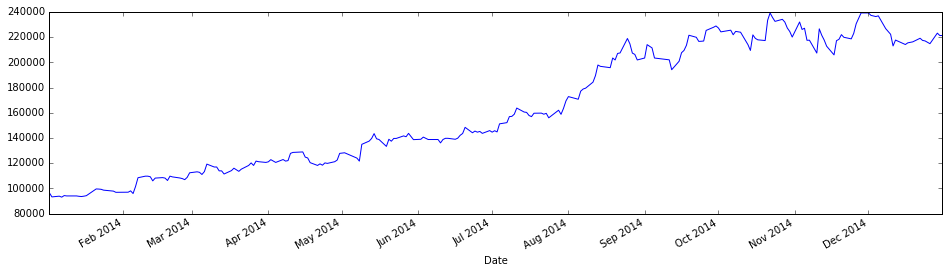

In [7]:
df['AMOREPACIFIC'].plot(figsize=(16,4))

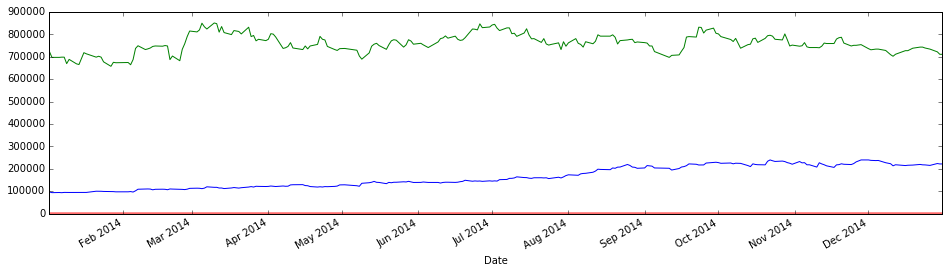

In [8]:
df['AMOREPACIFIC'].plot(figsize=(16,4), color='b')
df['NAVER'].plot(figsize=(16,4), color='g')
df['KOSPI Composite Index'].plot(figsize=(16,4), color='r')

## 등략률 (전일 대비)

In [9]:
changes = df.pct_change()
changes.head()

,DaelimInd,SK hynix,KAL,LotteConf,HyundaiMtr,Samsung Electronics,GC Corp,Ottogi,Mobis,S-1,KEPCO,SAMSUNG LIFE,NAVER,AMOREPACIFIC,CUCKOO,KOSPI Composite Index
Date,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.033477,0.021097,-0.012821,-0.037453,-0.002227,-0.009931,0.000000,-0.051534,-0.010753,-0.023968,-0.008683,-0.009852,-0.035862,-0.032771,NaN,-0.010701
2014-01-06,-0.089385,0.037190,0.016234,0.041690,0.020089,0.008488,0.032787,-0.010349,0.012681,0.000000,0.029197,0.009950,0.000000,0.006160,NaN,0.003669
2014-01-07,-0.003681,0.003984,-0.003195,-0.021345,0.002188,-0.002295,0.003968,0.005229,-0.007156,-0.009550,0.009929,0.000000,0.001431,-0.008163,NaN,0.003154
2014-01-08,0.000000,0.031746,0.025641,0.038168,0.002183,-0.009969,-0.007905,0.005202,-0.005405,0.016529,-0.005618,-0.004926,0.000000,0.013375,NaN,-0.000245


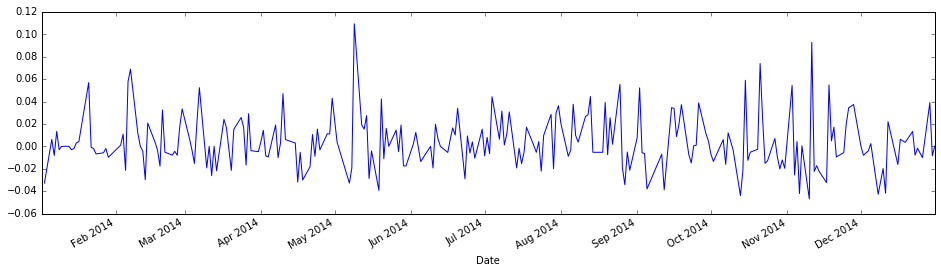

In [10]:
changes['AMOREPACIFIC'].plot(figsize=(16,4))

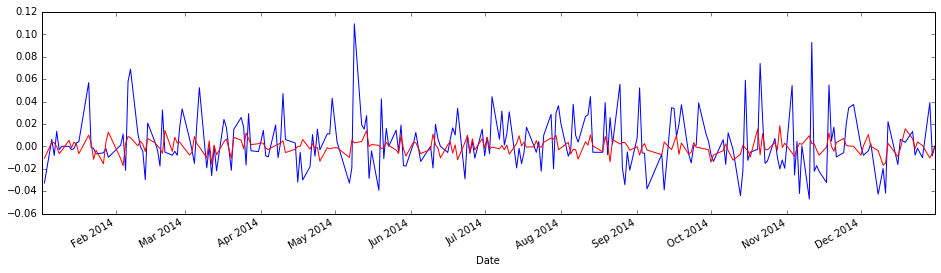

In [11]:
changes['AMOREPACIFIC'].plot(figsize=(16,4))
changes['KOSPI Composite Index'].plot(figsize=(16,4), color='r')

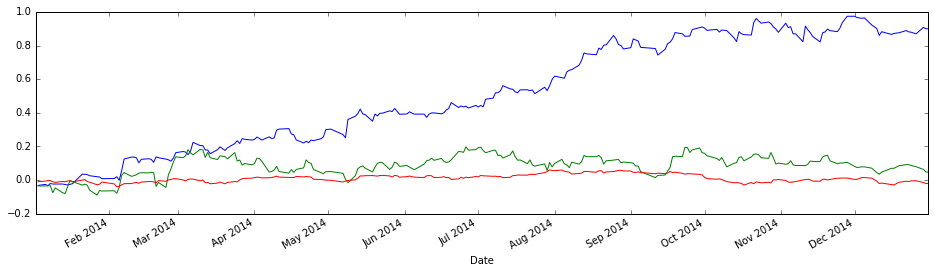

In [12]:
changes['AMOREPACIFIC'].cumsum().plot(figsize=(16,4), color='b')
changes['NAVER'].cumsum().plot(figsize=(16,4), color='g')
changes['KOSPI Composite Index'].cumsum().plot(figsize=(16,4), color='r')

## 수익과 위험

* 수익 returns: 수익률 평균 mean
* 위험 risk: 표준편차 std, 값이 클수록 변동성이 크므로 위험이 크다

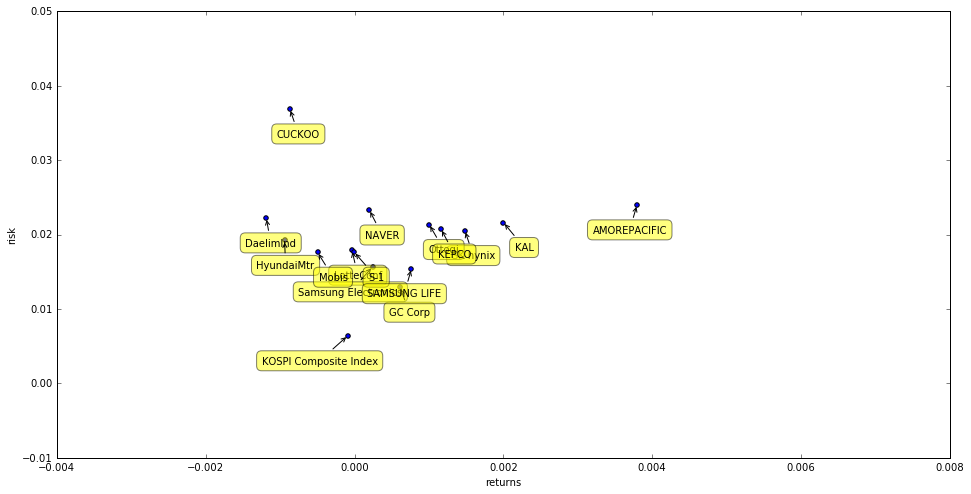

In [13]:
plt.figure(figsize=(16,8))

plt.scatter(changes.mean(), changes.std())
plt.xlabel('returns')
plt.ylabel('risk')

for label, x, y in zip(changes.columns, changes.mean(), changes.std()):
    plt.annotate( label, xy=(x, y), xytext=(30, -30), 
                 textcoords = 'offset points', 
                 ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5), 
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
